<a href="https://colab.research.google.com/github/DarkLord-13/Machine-Learning-01/blob/main/FaceRecognition%2BAttendanceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Create a folder named ImageAttendance and put images in it.

2. Create a csv file named Attendance.csv

In [ ]:
!pip install cmake

Dlib provides a pre-trained facial landmark detector that can detect 68 points on a face. As you can see in the image above, each facial feature is mapped with a set of points. If we want, for example, to locate a month in the face, we can use the points from 49 to 68.

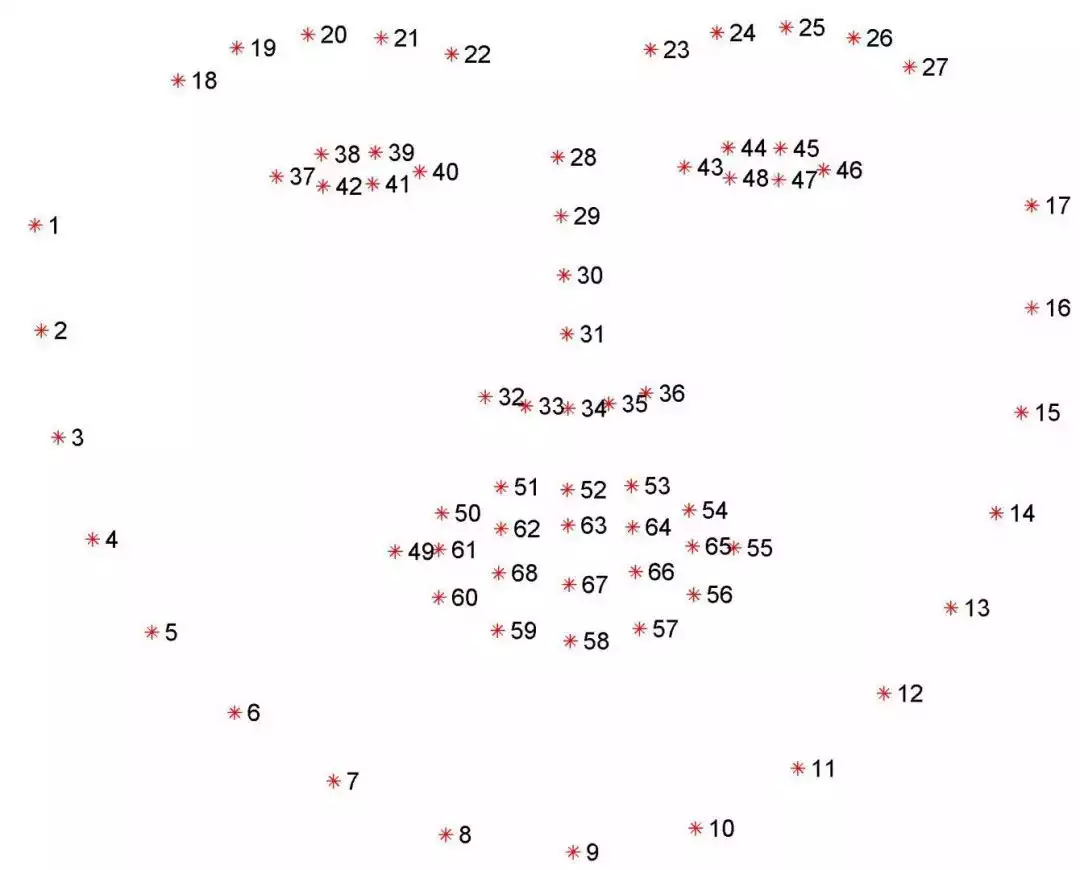

In [ ]:
!pip install dlib==19.18

In [ ]:
import numpy as np
import cv2
import face_recognition as fr
from PIL import Image
import cv2
import os
from datetime import datetime as dt

path = 'ImageAttendance'
myList = os.listdir(path)
images = []
classNames = []

for i in myList:
    curImg = cv2.imread(f'{path}/{i}')  # takes each img in path one by one
    curImg = cv2.cvtColor(curImg, cv2.COLOR_BGR2RGB)
    images.append(curImg)  # appends the read images as numpy array
    # appends the image name without its extension
    classNames.append(os.path.splitext(i)[0])


# returns the encoding of known faces
def findEncodings(images):
    encodeList = []
    for i in images:
        encode = fr.face_encodings(i)[0]
        encodeList.append(encode)
    return encodeList


def markAttendance(name):
    with open('Attendance.csv', 'r+') as f:
        myDataList = f.readlines()
        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])  # we append the name in the list

        if name not in nameList:
            now = dt.now()
            dtString = now.strftime('%H:%M:%S')
            f.writelines(f'\n{name}, {dtString}')


encodeListKnown = findEncodings(images)


cap = cv2.VideoCapture(0)

while True:
    success, img = cap.read()
    # imgs = cv2.resize(img, (0, 0), None, 0.25, 0.25)
    imgs = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # returns the location of all the faces in the frame
    facesInCurrFrame = fr.face_locations(imgs)

    # returns the encodings of all the faces in the frame
    encodesCurrFrame = fr.face_encodings(imgs, facesInCurrFrame)

    for encodeFace, faceLoc in zip(encodesCurrFrame, facesInCurrFrame):
        # [matches] stores a list of true false values, true->that known face matched with a face in our list of faces from our current frame
        # comparing every individual encoding of the faces found in the current capture with all the known faces in the list
        matches = fr.compare_faces(encodeListKnown, encodeFace)
        faceDistance = fr.face_distance(encodeListKnown, encodeFace)
        # print(faceDistance)
        # matchIndex stores the index of the facematched person
        # returns the index of the min distance
        matchIndex = np.argmin(faceDistance)

        # here we check whether the face for which we got the min distance is a match or not
        if matches[matchIndex] == True:
            # because there is a case where our min. distance might not be a match even

            # stores the name of the matched known face
            name = classNames[matchIndex].upper()
            markAttendance(name)

            # returns the coordinates of the face
            y1, x2, y2, x1 = faceLoc
            cv2.rectangle(img, (x1, y1+10), (x2, y2), (0, 255, 0), 2)
            cv2.rectangle(img, (x1, y2-20), (x2, y2), (0, 255, 0), cv2.FILLED)
            cv2.putText(img, name, (x1+6, y2-6),
                        cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 255, 255), 2)

            cv2.imshow('Webcam', img)
            cv2.waitKey(1)
